In [20]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px

client = bigquery.Client()

# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)
# List all the tables in the "chicago_crime" dataset

tables = list(client.list_tables(dataset))

# Print the table names
for table in tables:
    print(table.table_id)
    
# Specify the table name you're interested in (e.g., "crime")
table_name = "crime"

# Construct a reference to the specific table
table_ref = dataset_ref.table(table_name)

# API request - fetch the table
table = client.get_table(table_ref)

# Convert the table schema to a Pandas DataFrame
schema_df = pd.DataFrame(
    [{"name": field.name, "type": field.field_type, "mode": field.mode} for field in table.schema]
)

# Display the DataFrame
print("Table Schema for {}: \n{}".format(table_name, schema_df))




Using Kaggle's public dataset BigQuery integration.
crime
Table Schema for crime: 
                    name       type      mode
0             unique_key    INTEGER  REQUIRED
1            case_number     STRING  NULLABLE
2                   date  TIMESTAMP  NULLABLE
3                  block     STRING  NULLABLE
4                   iucr     STRING  NULLABLE
5           primary_type     STRING  NULLABLE
6            description     STRING  NULLABLE
7   location_description     STRING  NULLABLE
8                 arrest    BOOLEAN  NULLABLE
9               domestic    BOOLEAN  NULLABLE
10                  beat    INTEGER  NULLABLE
11              district    INTEGER  NULLABLE
12                  ward    INTEGER  NULLABLE
13        community_area    INTEGER  NULLABLE
14              fbi_code     STRING  NULLABLE
15          x_coordinate      FLOAT  NULLABLE
16          y_coordinate      FLOAT  NULLABLE
17                  year    INTEGER  NULLABLE
18            updated_on  TIMESTAMP  NULLAB

In [21]:
from google.cloud import bigquery

# Set up BigQuery client
client = bigquery.Client()

# Define your SQL query
project_id = table_ref.project
dataset_id = table_ref.dataset_id
table_id = table_ref.table_id

sql_query = f"""
    SELECT *
    FROM `{project_id}.{dataset_id}.{table_id}`
    WHERE year = 2023
    ORDER BY date DESC
    limit 50000
    
"""

# Execute the SQL query
query_job = client.query(sql_query)

# Fetch the query results into a Pandas DataFrame
df = query_job.to_dataframe()


Using Kaggle's public dataset BigQuery integration.


In [22]:
pd.set_option('display.max_columns', None)



df['date_time'] = pd.to_datetime(df['date'])
df['date'] = df['date_time'].dt.date
df['time_of_day'] = df['date_time'].dt.time



display(df.head())
display(df.tail())


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,date_time,time_of_day
0,13324029,JG560426,2023-12-31,0000X W GRAND AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1831,18,42,8,15,1175975.0,1903895.0,2023,2024-01-08 03:59:56+00:00,41.891653,-87.629172,"(41.891653037, -87.62917162)",2023-12-31 12:55:00+00:00,12:55:00
1,13324353,JG560815,2023-12-31,065XX S HALSTED ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,723,7,16,68,06,1172095.0,1861462.0,2023,2024-01-08 03:59:56+00:00,41.775300,-87.644670,"(41.775299593, -87.644670291)",2023-12-31 12:54:00+00:00,12:54:00
2,13324033,JG560401,2023-12-31,060XX S PULASKI RD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),True,True,813,8,23,65,08B,1150742.0,1864083.0,2023,2024-01-08 03:59:56+00:00,41.782935,-87.722880,"(41.78293459, -87.722880268)",2023-12-31 12:52:00+00:00,12:52:00
3,13324394,JG560883,2023-12-31,073XX S MAPLEWOOD AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,835,8,18,66,07,1160644.0,1855993.0,2023,2024-01-08 03:59:56+00:00,41.760536,-87.686799,"(41.76053583, -87.686799119)",2023-12-31 12:51:00+00:00,12:51:00
4,13323960,JG560395,2023-12-31,055XX W SCHOOL ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,1633,16,30,15,15,1138773.0,1921390.0,2023,2024-01-08 03:59:56+00:00,41.940418,-87.765373,"(41.94041781, -87.76537323)",2023-12-31 12:51:00+00:00,12:51:00


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,date_time,time_of_day
49995,13250940,JG472485,2023-10-21,065XX S KOLIN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,VEHICLE NON-COMMERCIAL,False,False,833,8,13,65,07,1148500.0,1860837.0,2023,2023-10-29 03:42:52+00:00,41.774070,-87.731184,"(41.774070422, -87.731183591)",2023-10-21 05:00:00+00:00,05:00:00
49996,13254693,JG477175,2023-10-21,058XX N WINTHROP AVE,0810,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,False,False,2022,20,48,77,06,1167806.0,1939007.0,2023,2023-10-29 03:42:52+00:00,41.988182,-87.658157,"(41.988182041, -87.658156779)",2023-10-21 05:00:00+00:00,05:00:00
49997,13251630,JG472575,2023-10-21,014XX N KARLOV AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,2534,25,36,23,06,1148791.0,1909168.0,2023,2023-10-29 03:42:52+00:00,41.906691,-87.728870,"(41.906691477, -87.728869934)",2023-10-21 05:00:00+00:00,05:00:00
49998,13255100,JG476509,2023-10-21,048XX N MILWAUKEE AVE,0610,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,False,False,1623,16,45,11,05,1139924.0,1931464.0,2023,2023-10-29 03:42:52+00:00,41.968041,-87.760896,"(41.9680408, -87.760895536)",2023-10-21 05:00:00+00:00,05:00:00
49999,13251243,JG472963,2023-10-21,042XX N MASON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1624,16,38,15,08B,1135925.0,1927478.0,2023,2023-10-29 03:42:52+00:00,41.957175,-87.775695,"(41.957175209, -87.775695189)",2023-10-21 05:00:00+00:00,05:00:00


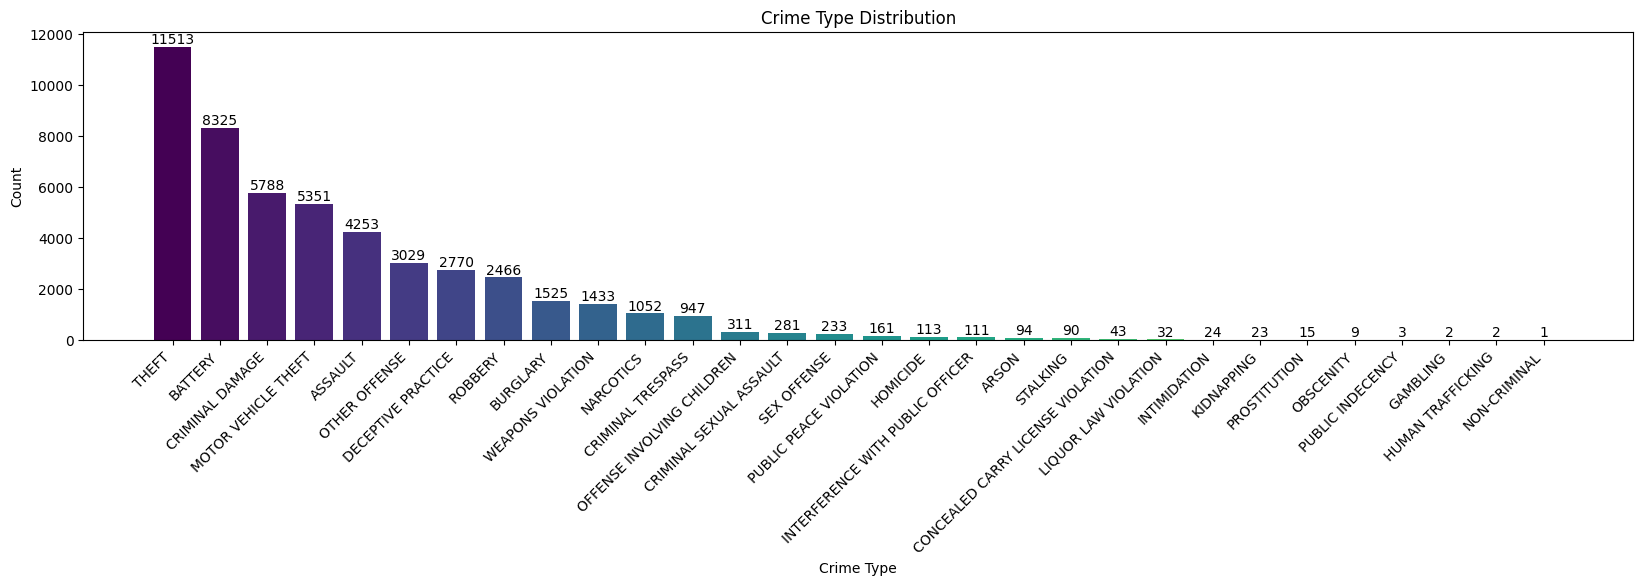

In [23]:

type_counts = df['primary_type'].value_counts()

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(type_counts)))

fig, ax = plt.subplots(figsize=(20, 4))  # Adjust the width and height as needed
# Plot the bar chart with colormap
bars = plt.bar(type_counts.index, type_counts.values, color=colors)

# Add labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Crime Type Distribution')
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right for better visibility

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')

#display(type_counts)

# Show the plot
plt.show()

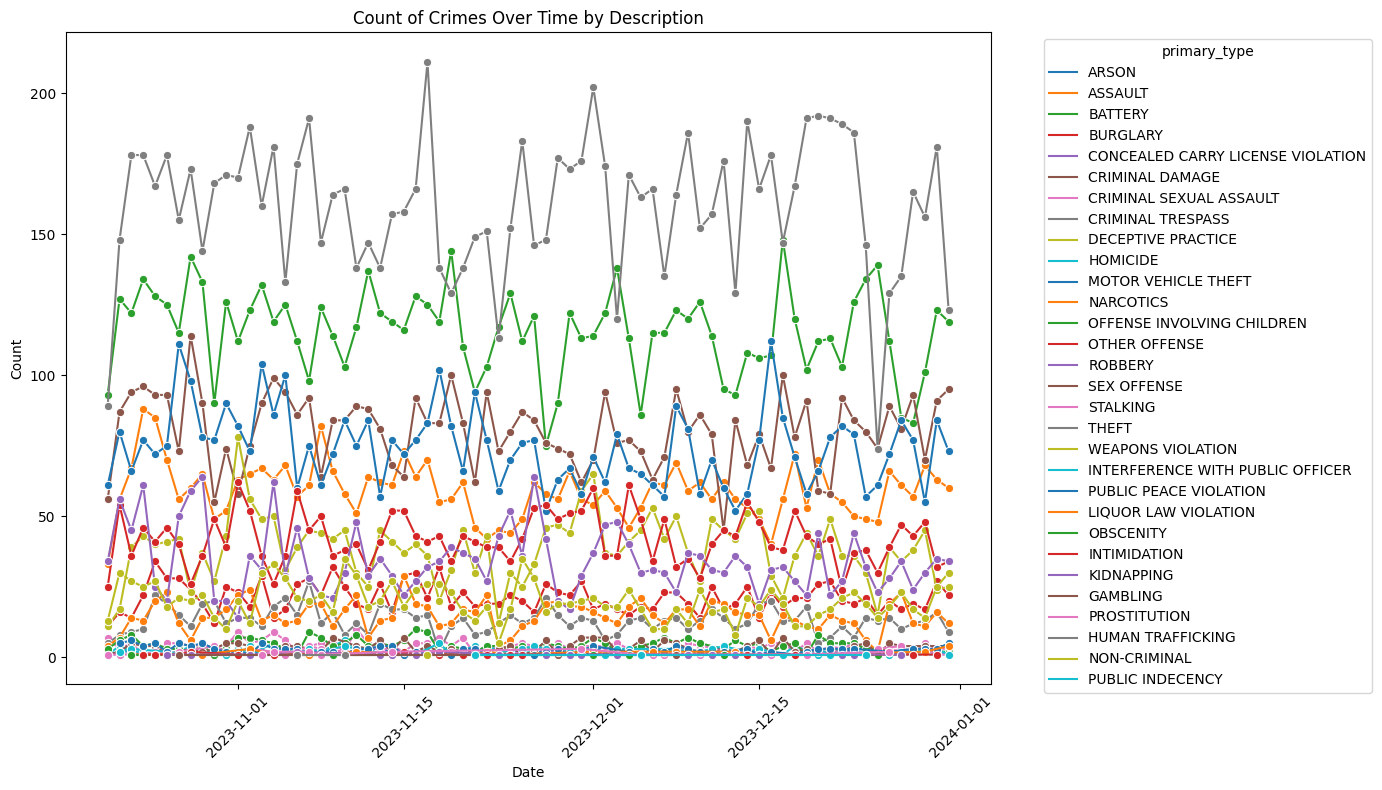

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress FutureWarnings related to Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)


# Group by 'date' and 'description' and get counts
line_graph = df.groupby(['date', 'primary_type']).size().reset_index(name='count')

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='count', hue='primary_type', data= line_graph, marker='o', palette='tab10')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Crimes Over Time by Description')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='primary_type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Display the plot
plt.tight_layout()
plt.show()


In [25]:
#df.to_csv('chicago_crimes_2023.csv', index = False)

In [26]:

import plotly.express as px



group = df.groupby(['date', 'primary_type'])[['unique_key', 'description']].count().reset_index()
group = group[group['primary_type'] == 'THEFT']


fig = px.line(group, x = 'date', y = 'unique_key', title = 'Total Count by Theft')

print(group.head())

fig.show()

           date primary_type  unique_key  description
17   2023-10-21        THEFT          89           89
38   2023-10-22        THEFT         148          148
61   2023-10-23        THEFT         178          178
84   2023-10-24        THEFT         178          178
104  2023-10-25        THEFT         167          167


In [27]:
group['theif_count'] = group['unique_key']
fig = px.bar(group, x="primary_type", y="unique_key")
              

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()
display(group)


,date,primary_type,unique_key,description,theif_count
17,2023-10-21,THEFT,89,89,89
38,2023-10-22,THEFT,148,148,148
61,2023-10-23,THEFT,178,178,178
84,2023-10-24,THEFT,178,178,178
104,2023-10-25,THEFT,167,167,167
...,...,...,...,...,...
1394,2023-12-27,THEFT,135,135,135
1413,2023-12-28,THEFT,165,165,165
1431,2023-12-29,THEFT,156,156,156
1451,2023-12-30,THEFT,181,181,181
